# Model Training (model own data 1)

### 0. Imports

In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    BatchNormalization,
    Activation,
    MaxPooling2D
)
from keras.preprocessing.image import ImageDataGenerator

### 1. Paths

In [2]:
# DATASET_BASE_TRAIN_PATH = "/Users/adamdabkowski/DataspellProjects/Praca_dyplomowa/data/train_resized"
DATASET_BASE_TRAIN_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/train_resized"

# DATASET_BASE_TRAIN_PATH = "../new_data"

# DATASET_BASE_TEST_PATH = "/Users/adamdabkowski/DataspellProjects/Praca_dyplomowa/data/test_resized"
DATASET_BASE_TEST_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/test_resized"

### 2. Data preprocessing

In [3]:
batch_size  = 32
img_size = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(
    DATASET_BASE_TRAIN_PATH,
    target_size = (img_size,img_size),
    color_mode = "grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
)

test_set = datagen_val.flow_from_directory(
    DATASET_BASE_TEST_PATH,
    target_size=(img_size,img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### 5. Model creating

In [4]:
CATEGORIES = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    filepath="./model_base_data_1.h5",
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    restore_best_weights=True,
)

reduce_learning_rate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    verbose=1,
    min_delta=0.0001,
)

callbacks_list = [early_stopping, checkpoint, reduce_learning_rate]

In [6]:
from keras.optimizers import Adam

n_classes = len(CATEGORIES)

model = Sequential()

model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (img_size,img_size,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(n_classes, activation='softmax'))

In [7]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       2

### 6. Model training

In [8]:
epochs = 50

In [9]:
history = model.fit_generator(
    generator=train_set,
    steps_per_epoch=train_set.n//train_set.batch_size,
    epochs=epochs,
    validation_data = test_set,
    validation_steps = test_set.n//test_set.batch_size,
    callbacks=callbacks_list,
)

Epoch 1/50


C:\Users\adamd\AppData\Local\Temp\ipykernel_6552\2934536250.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


897/897 [==============================] - ETA: 0s - loss: 1.6906 - accuracy: 0.3524
Epoch 1: val_loss improved from inf to 1.99653, saving model to .\model_base_data_1.h5
897/897 [==============================] - 1359s 2s/step - loss: 1.6906 - accuracy: 0.3524 - val_loss: 1.9965 - val_accuracy: 0.2049 - lr: 0.0010
Epoch 2/50
897/897 [==============================] - ETA: 0s - loss: 1.3447 - accuracy: 0.4817
Epoch 2: val_loss improved from 1.99653 to 1.32532, saving model to .\model_base_data_1.h5
897/897 [==============================] - 1348s 2s/step - loss: 1.3447 - accuracy: 0.4817 - val_loss: 1.3253 - val_accuracy: 0.4867 - lr: 0.0010
Epoch 3/50
897/897 [==============================] - ETA: 0s - loss: 1.2098 - accuracy: 0.5383
Epoch 3: val_loss improved from 1.32532 to 1.27875, saving model to .\model_base_data_1.h5
897/897 [==============================] - 1339s 1s/step - loss: 1.2098 - accuracy: 0.5383 - val_loss: 1.2787 - val_accuracy: 0.5080 - lr: 0.0010
Epoch 4/50
897/8

### 7. Results

**7.1 Loss**

NameError: name 'history' is not defined

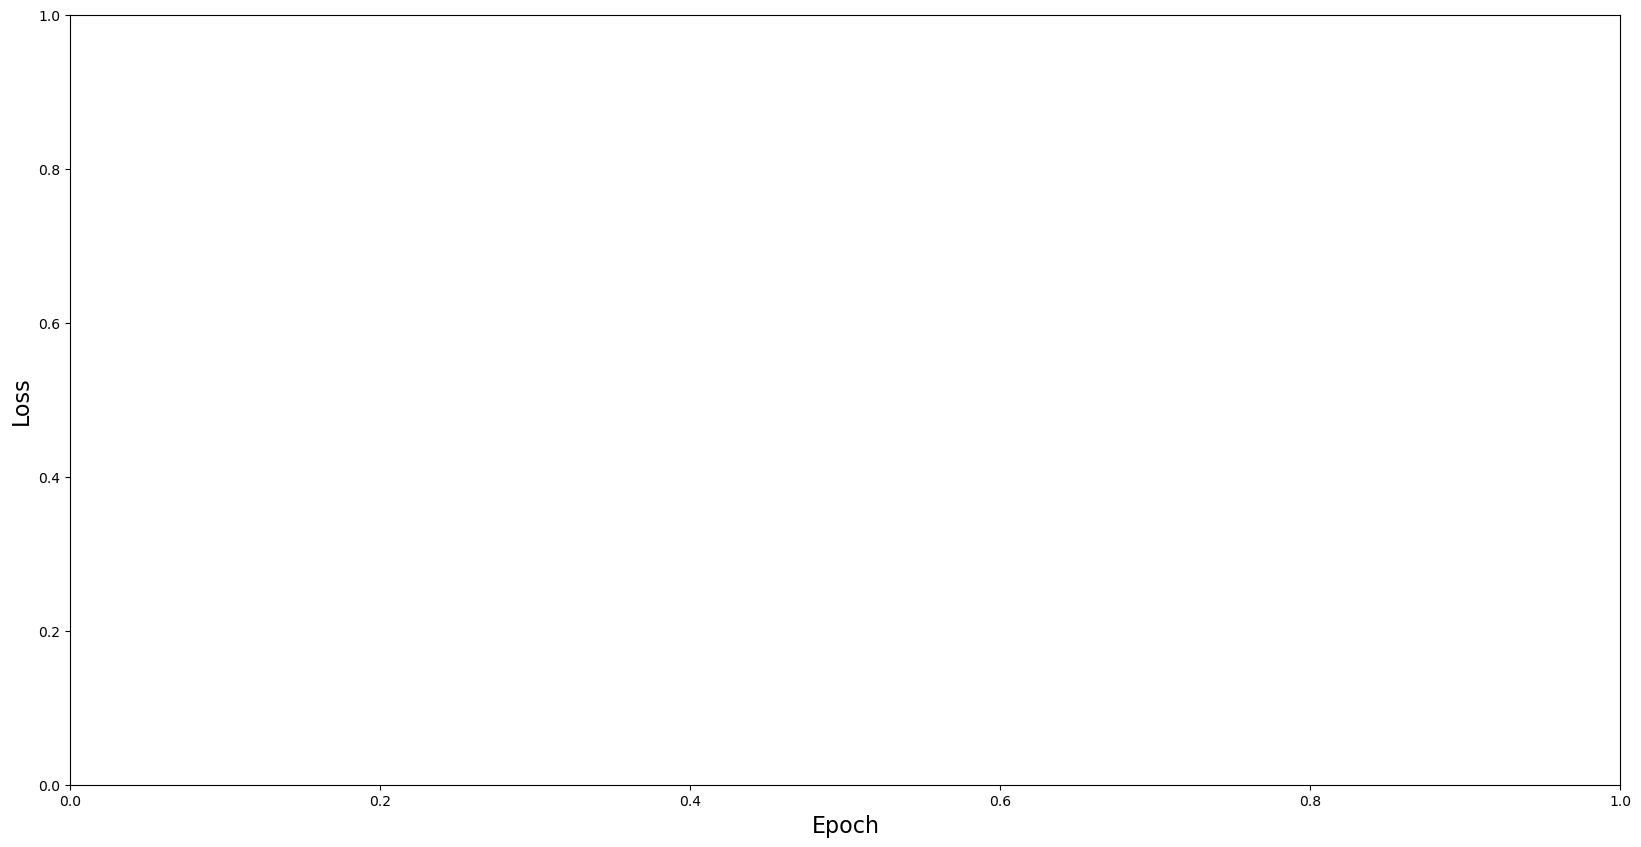

In [4]:
plt.figure(figsize=(20,10))
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

**7.2 Accuracy**

In [2]:
plt.figure(figsize=(20,10))
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

NameError: name 'plt' is not defined

In [3]:
import matplotlib.pyplot as plt